In [1]:
import sys
if '.' not in sys.path:
    sys.path.append('.')

from time import sleep
import numpy as np
import gym

import gymEnvs
from util import *
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

In [2]:
env = myFrozenLake(size=30, randomMap=True, slippery=True, rewarding=True, equiProbable=True, frozenProb=0.9)

# POLICY ITERATION

In [15]:
theta=1e-3
gamma=0.9
begin = time.time()
sb_pol_pi, sb_pol_V, pol_deltas, polstable, mainLoopCounter, duration = sbpoliter(env,gamma,theta)

Total iterations:158 Duration:3.1928281784057617


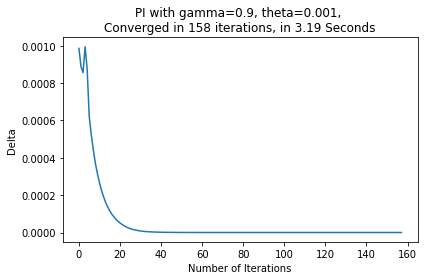

In [16]:
plt.plot(pol_deltas)
plt.xlabel("Number of Iterations")
plt.ylabel("Delta")
plt.title("PI with gamma={}, theta={}, \nConverged in {} iterations, in {} Seconds".format(gamma, theta, mainLoopCounter, round(duration,2)))
plt.tight_layout()
plt.savefig("./Figures/PI_delta_plot2.png")

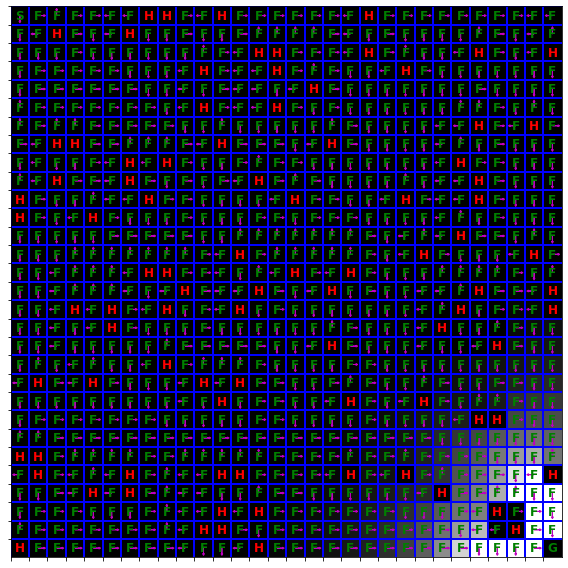

In [17]:
plotFLPolicy(np.eye(env.nA)[sb_pol_pi],sb_pol_V,env,30)
plt.tight_layout()
plt.savefig("./Figures/PI_policy2.png")

In [18]:
averageAccumulatedRewards, holesFallen = policyScore(env,sb_pol_pi)

In [7]:
(averageAccumulatedRewards, holesFallen)

(9.968663333333328, 0)

# VALUE ITERATION

In [19]:
theta=1e-3
gamma=0.9
begin = time.time()
sb_val_pi, sb_val_V, val_deltas, mainLoopCounter, duration = sbvaliter(env,gamma,theta)

Total iterations:37 Duration:0.40223264694213867


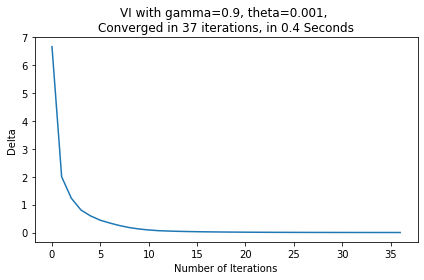

In [20]:
plt.plot(val_deltas)
plt.xlabel("Number of Iterations")
plt.ylabel("Delta")
plt.title("VI with gamma={}, theta={}, \nConverged in {} iterations, in {} Seconds".format(gamma, theta, mainLoopCounter, round(duration,2)))
plt.tight_layout()
plt.savefig("./Figures/VI_delta_plot2.png")

# DIFFERENCE IN POLICY

In [10]:
np.where(sb_pol_pi!=sb_val_pi)

(array([  0,   1,   3,   4,  13,  14,  15,  16,  17,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  34,  40,  42,  47,  51,  52,  53,
         54,  56,  57,  58,  60,  61,  63,  64,  65,  69,  71,  76,  82,
         83,  87,  90,  91,  92,  93,  94,  95,  96,  97,  98, 113, 114,
        116, 117, 120, 121, 122, 123, 124, 125, 126, 127, 128, 134, 138,
        139, 140, 142, 143, 144, 146, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 168, 169, 170, 171, 172, 173, 180, 181, 184, 185, 186,
        187, 188, 199, 200, 201, 202, 210, 215, 223, 224, 225, 240, 250,
        252, 254, 255, 280, 281, 310, 311, 312, 332, 339, 340, 341, 342,
        343, 344, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 381,
        390, 391, 392, 400, 420, 421, 450, 451, 474, 480, 481, 489, 499,
        503, 510, 511, 521, 540, 541, 570, 572, 615, 616, 630, 640, 645,
        660, 661, 662, 663, 664, 665, 666, 667, 675, 692, 693, 694, 723,
        729, 758, 782, 788, 799, 810, 811, 812, 813

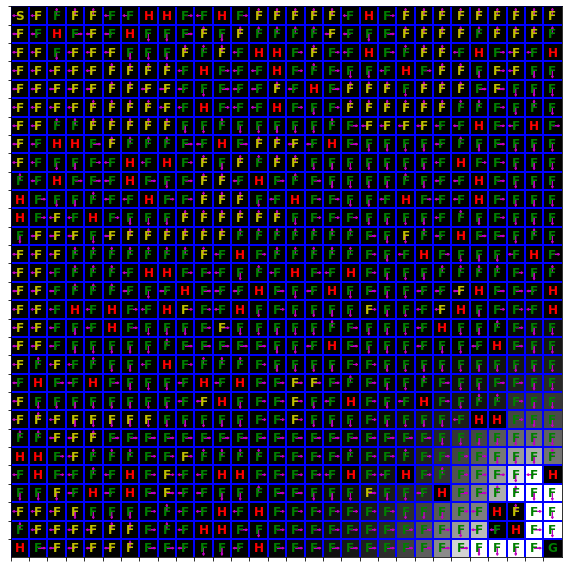

In [12]:
pol2=sb_val_pi
pol1=sb_pol_pi
flsize=30
diff = np.where(pol1.reshape(flsize, flsize) != pol2.reshape(flsize, flsize))
yellows = list(zip(diff[0],diff[1]))

fl_policy_viz(np.eye(env.nA)[sb_val_pi], sb_val_V, env, 30,yellows)
plt.tight_layout()
plt.savefig("./Figures/pi_vi_pol_diff.png")

In [21]:
averageAccumulatedRewards, holesFallen = policyScore(env,sb_val_pi)

In [22]:
averageAccumulatedRewards, holesFallen

(9.679327333333362, 0)

# QLEARNING

In [151]:
qtable, maxDeltas, rewards, episodeLengths, times = qlearning(env,100000, alpha=0.1, epsilon=1, gamma=0.99, epsilon_decay=.9999, alpha_decay=1, max_steps=1000)

Episode:10000 NumHitGoal:0
Episode:15000 NumHitGoal:0
Episode:20000 NumHitGoal:0
23246
Episode:25000 NumHitGoal:19
Episode:30000 NumHitGoal:255
Episode:35000 NumHitGoal:769
Episode:40000 NumHitGoal:1328
Episode:45000 NumHitGoal:1982
Episode:50000 NumHitGoal:2655
Episode:55000 NumHitGoal:3335
Episode:60000 NumHitGoal:4028
Episode:65000 NumHitGoal:4700
Episode:70000 NumHitGoal:5380
Episode:75000 NumHitGoal:6063
Episode:80000 NumHitGoal:6783
Episode:85000 NumHitGoal:7423
Episode:90000 NumHitGoal:8088
Episode:95000 NumHitGoal:8783


# PLOTTING THE REWARDS

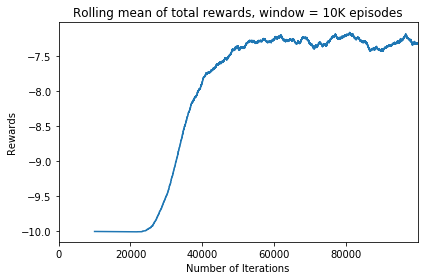

In [179]:
pd.Series(rewards).rolling(10000,10000).mean().plot()
plt.xlabel("Number of Iterations")
plt.ylabel("Rewards")
plt.title("Rolling mean of total rewards, window = 10K episodes")
plt.tight_layout()
plt.savefig("./Figures/Q_rew.png")

# PLOTTING DURATIONS

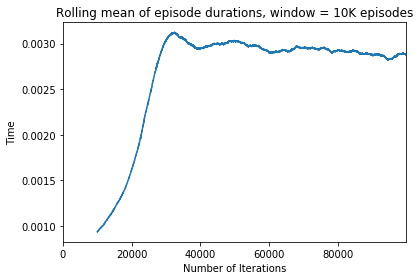

In [180]:
pd.Series(times).rolling(10000,10000).mean().plot()
plt.xlabel("Number of Iterations")
plt.ylabel("Time")
plt.title("Rolling mean of episode durations, window = 10K episodes")
plt.tight_layout()
plt.savefig("./Figures/Q_time.png")

# TOTAL RUNNING TIME

In [213]:
np.sum(times)/60

4.351115800000045

# SCORE

In [183]:
policyScore(env,qtable,q=True)

(9.829355666666666, 2)

# VISUALIZATION

In [205]:
pol2=qtable.argmax(axis=1)
pol1=sb_pol_pi
flsize=30
diff = np.where(pol1.reshape(flsize, flsize) != pol2.reshape(flsize, flsize))
yellows = list(zip(diff[0],diff[1]))

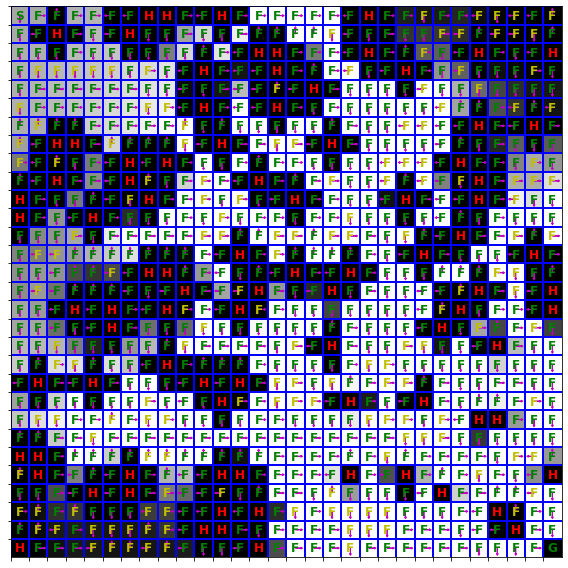

In [208]:
fl_policy_viz(qtable, qtable.mean(axis=1), env, 30,yellows)
plt.tight_layout()
plt.savefig("./Figures/q_pol_diff.png")